In [16]:
# coding:utf-8
# 导入warnings包，利用过滤器来实现忽略警告语句
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import missingno as msno
sns.set_style('white')

In [3]:
# 载入数据
path = '../data/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')  

### 特征描述

name - 汽车编码

regDate - 汽车注册时间

model - 车型编码

brand - 品牌

bodyType - 车身类型

fuelType - 燃油类型

gearbox - 变速箱

power - 汽车功率

kilometer - 汽车行驶公里

notRepairedDamage - 汽车有尚未修复的损坏

regionCode - 看车地区编码

seller - 销售方

offerType - 报价类型

creatDate - 广告发布时间

price - 汽车价格

v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】

In [4]:
Train_data.head().append(Train_data.tail()) 

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


### 总览数据概况

1.describe种有每列的统计量，个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值 看这个信息主要是瞬间掌握数据的大概的范围以及每个值的异常值的判断，比如有的时候会发现999 9999 -1 等值这些其实都是nan的另外一种表达方式，有的时候需要注意下

2.info 通过info来了解数据每列的type，有助于了解是否存在除了nan以外的特殊符号异常

In [7]:
print(Train_data.shape)
Train_data.info()

(150000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  in

Train_data.describe()  

### 判断数据缺失和异常 

In [10]:
# 查看每列的存在nan情况
Train_data.isnull().sum().sort_values()  

SaleID                  0
v_12                    0
v_11                    0
v_10                    0
v_9                     0
v_8                     0
v_7                     0
v_6                     0
v_5                     0
v_4                     0
v_3                     0
v_2                     0
v_1                     0
v_0                     0
v_13                    0
price                   0
offerType               0
seller                  0
regionCode              0
notRepairedDamage       0
kilometer               0
power                   0
brand                   0
regDate                 0
name                    0
creatDate               0
v_14                    0
model                   1
bodyType             4506
gearbox              5981
fuelType             8680
dtype: int64

In [11]:
Test_data.isnull().sum().sort_values()  

SaleID                  0
v_12                    0
v_11                    0
v_10                    0
v_9                     0
v_8                     0
v_7                     0
v_6                     0
v_5                     0
v_4                     0
v_3                     0
v_2                     0
v_1                     0
v_0                     0
creatDate               0
offerType               0
seller                  0
regionCode              0
notRepairedDamage       0
kilometer               0
power                   0
brand                   0
model                   0
regDate                 0
name                    0
v_13                    0
v_14                    0
bodyType             1413
gearbox              1910
fuelType             2893
dtype: int64

In [12]:
# 缺失比例统计
def missing_value_df(df):
    """输出缺失值数目以及对应的确实比例"""
    values_missing = df.isnull().sum() 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'values_missing':values_missing,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df

    
missing_value_df(Train_data)

,values_missing,percent_missing
SaleID,0,0.000000
v_12,0,0.000000
v_11,0,0.000000
v_10,0,0.000000
v_9,0,0.000000
v_8,0,0.000000
v_7,0,0.000000
v_6,0,0.000000
v_5,0,0.000000
v_4,0,0.000000


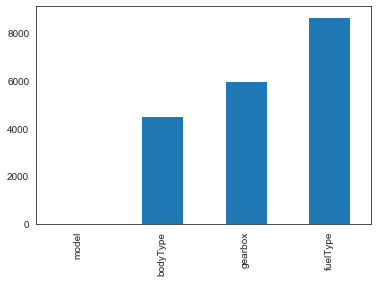

In [17]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0] 
missing.sort_values(inplace=True)
missing.plot.bar() 

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

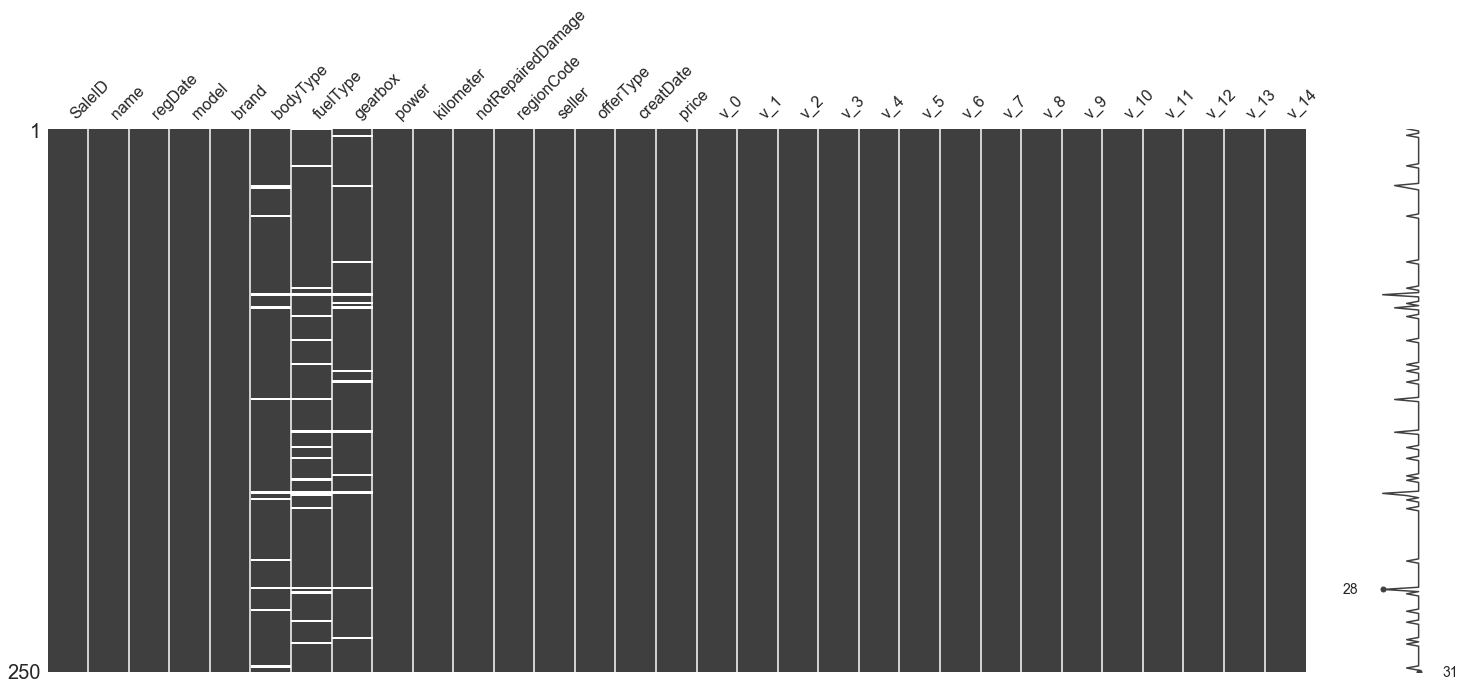

In [18]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))  

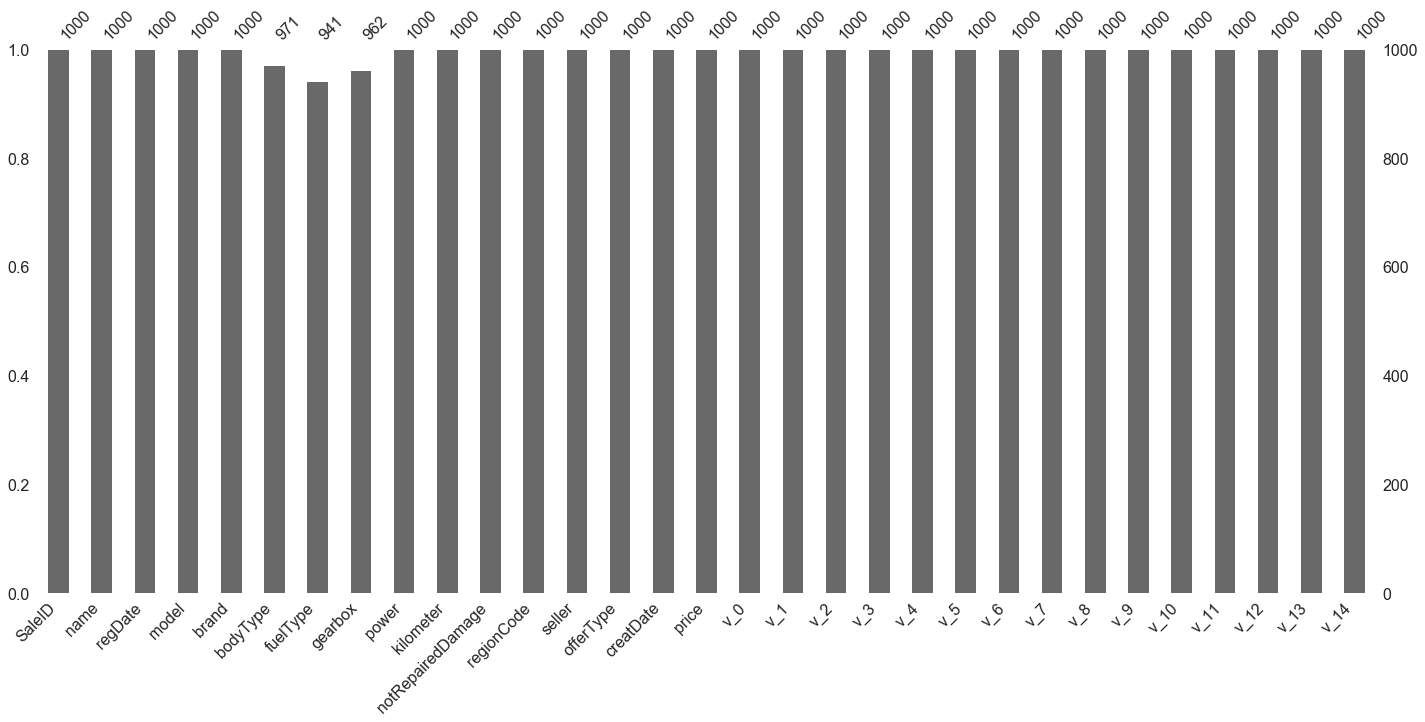

In [19]:
msno.bar(Train_data.sample(1000))  

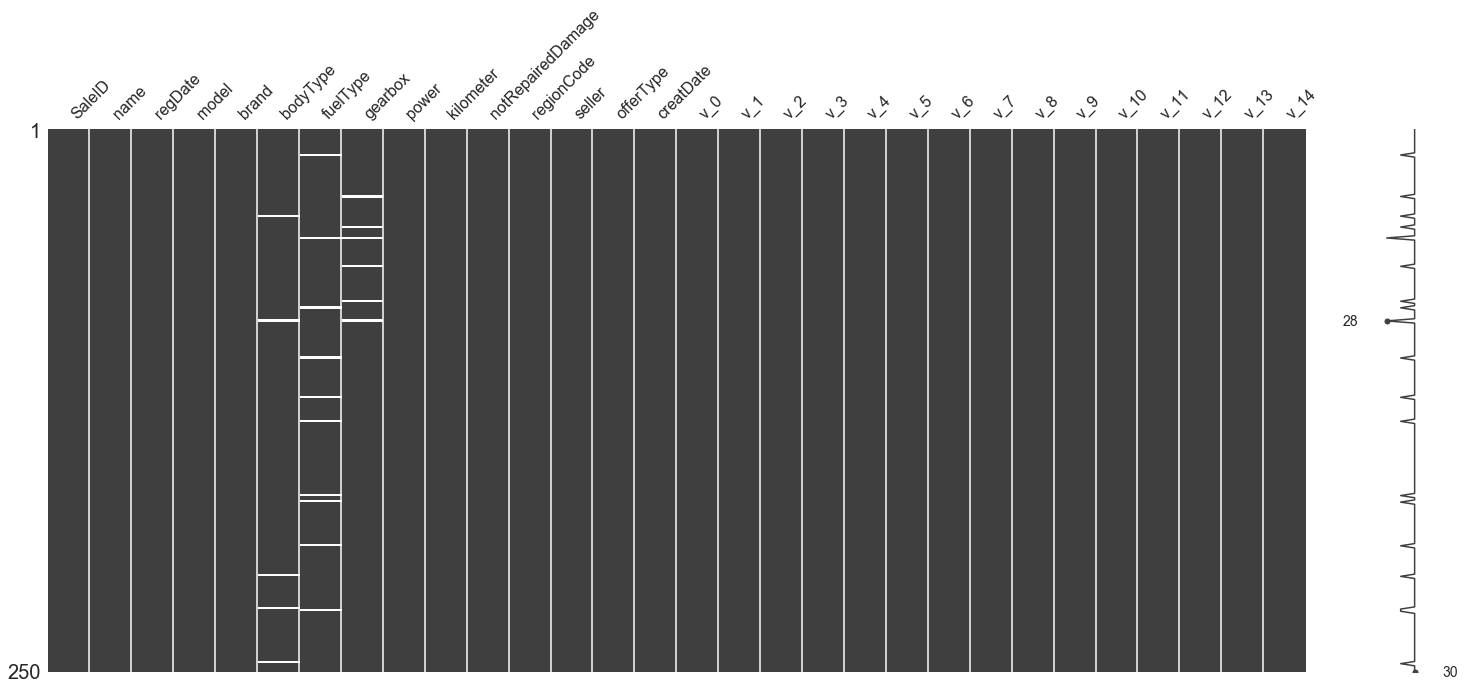

In [20]:
# 测试集--可视化看下缺省值
msno.matrix(Test_data.sample(250)) 

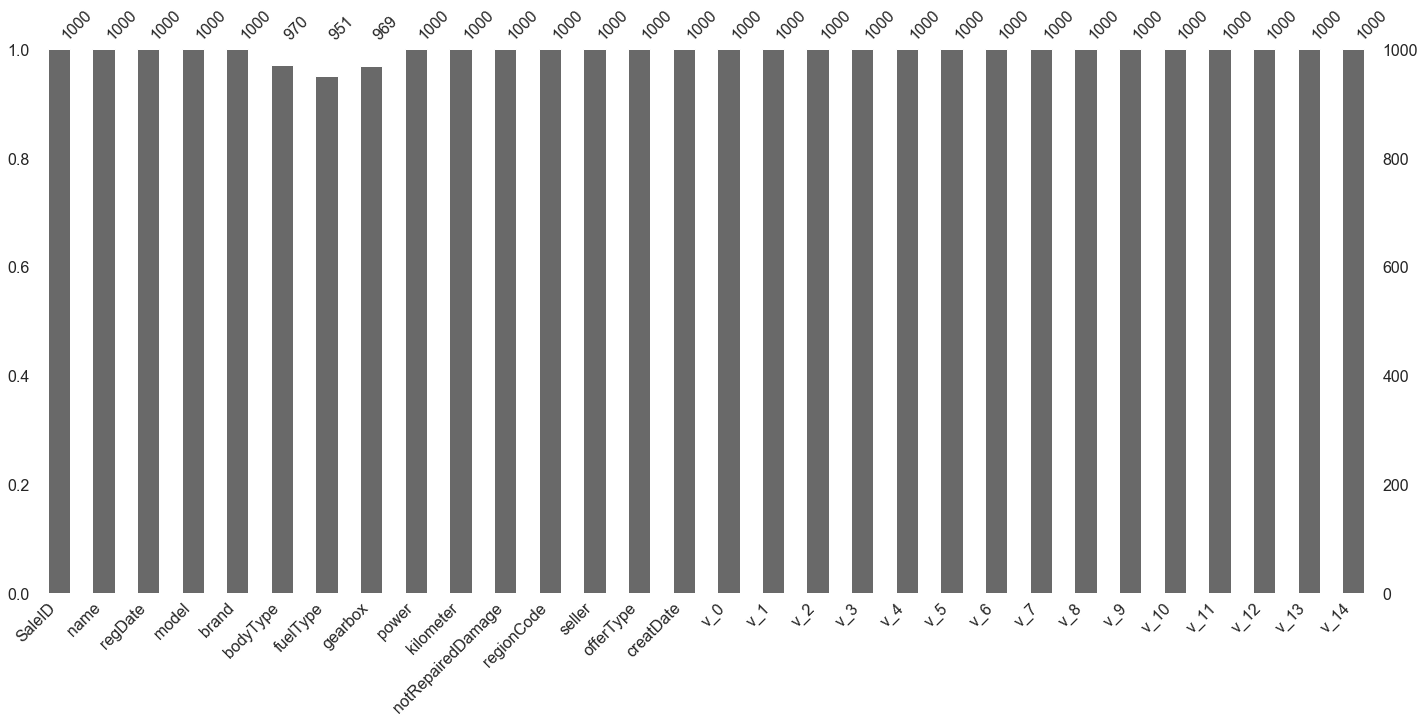

In [21]:
msno.bar(Test_data.sample(1000))  

In [22]:
# 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

可以发现除了notRepairedDamage 为object类型其他都为数字 这里我们把他的几个不同的值都进行显示就知道了 

In [23]:
Train_data['notRepairedDamage'].value_counts() 

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [25]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True) 
Train_data['notRepairedDamage'].value_counts()  

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [26]:
Test_data['notRepairedDamage'].value_counts()  

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [27]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Test_data['notRepairedDamage'].value_counts()   

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大  

In [28]:
Train_data["seller"].value_counts()  

0    149999
1         1
Name: seller, dtype: int64

In [29]:
Train_data["offerType"].value_counts()  

0    150000
Name: offerType, dtype: int64

In [30]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

### 目标变量的分布  

In [31]:
Train_data['price']  

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [32]:
Train_data['price'].value_counts() 

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

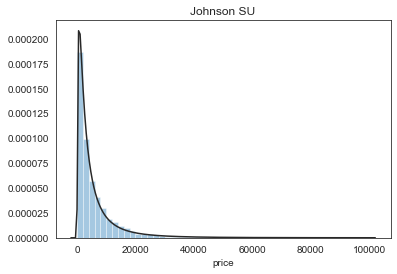

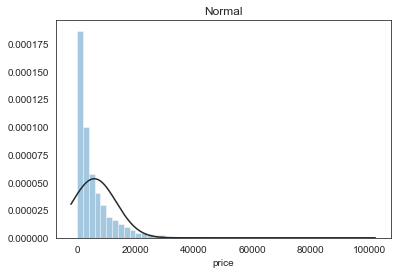

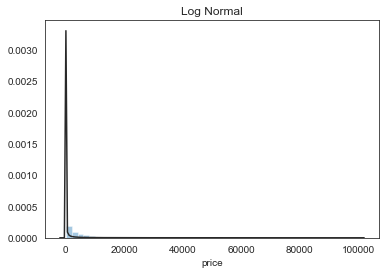

In [33]:
# 总体分布概况（无界约翰逊分布等）
import scipy.stats as st

y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
# 价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

Skewness: 3.346487
Kurtosis: 18.995183


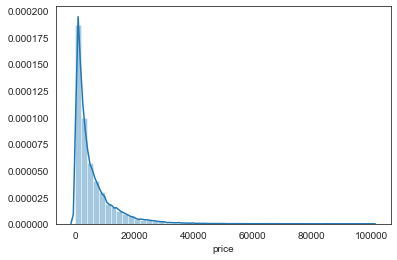

In [34]:
# 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())   

In [35]:
Train_data.skew(), Train_data.kurt()  

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

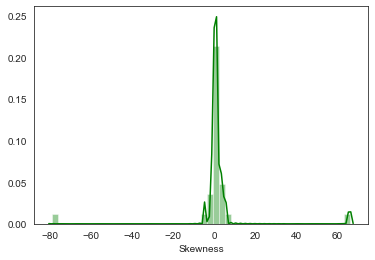

In [37]:
sns.distplot(Train_data.skew(),color='green',axlabel ='Skewness') 

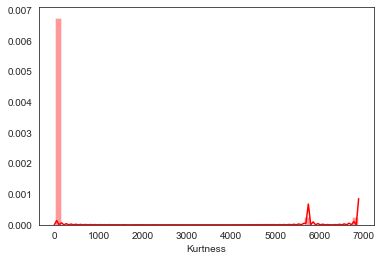

In [39]:
sns.distplot(Train_data.kurt(),color='red',axlabel ='Kurtness')

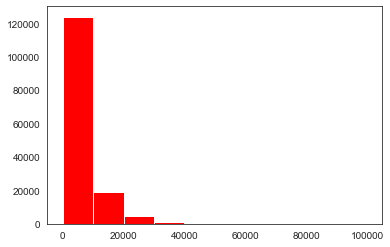

In [40]:
# 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

# 查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

In [53]:
# 大于20000得值占比 可以当做异常值nan 然后填补
Train_data[Train_data['price']>20000 ].shape[0]/len(Train_data) 

0.04778

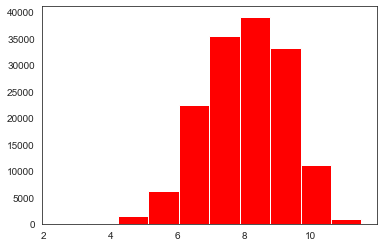

In [54]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()  

### 特征分布

类别特征 

数字特征 


In [55]:
# 分离label即预测值
Y_train = Train_data['price']  

这个区别方式适用于没有直接label coding的数据

这里不适用，需要人为根据实际含义来区分


1.数字特征

numeric_features = Train_data.select_dtypes(include=[np.number])

numeric_features.columns

2.类型特征

categorical_features = Train_data.select_dtypes(include=[np.object])

categorical_features.columns

In [56]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [58]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有{}个不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())        

name的特征分布如下：
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有248个不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有40个不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [59]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())   

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个8不同的值
0.

### 数字特征分析

In [60]:
numeric_features.append('price') 
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [63]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')   

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



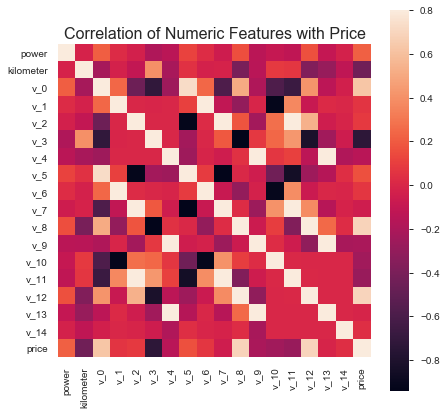

In [64]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [65]:
del price_numeric['price'] 

In [66]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


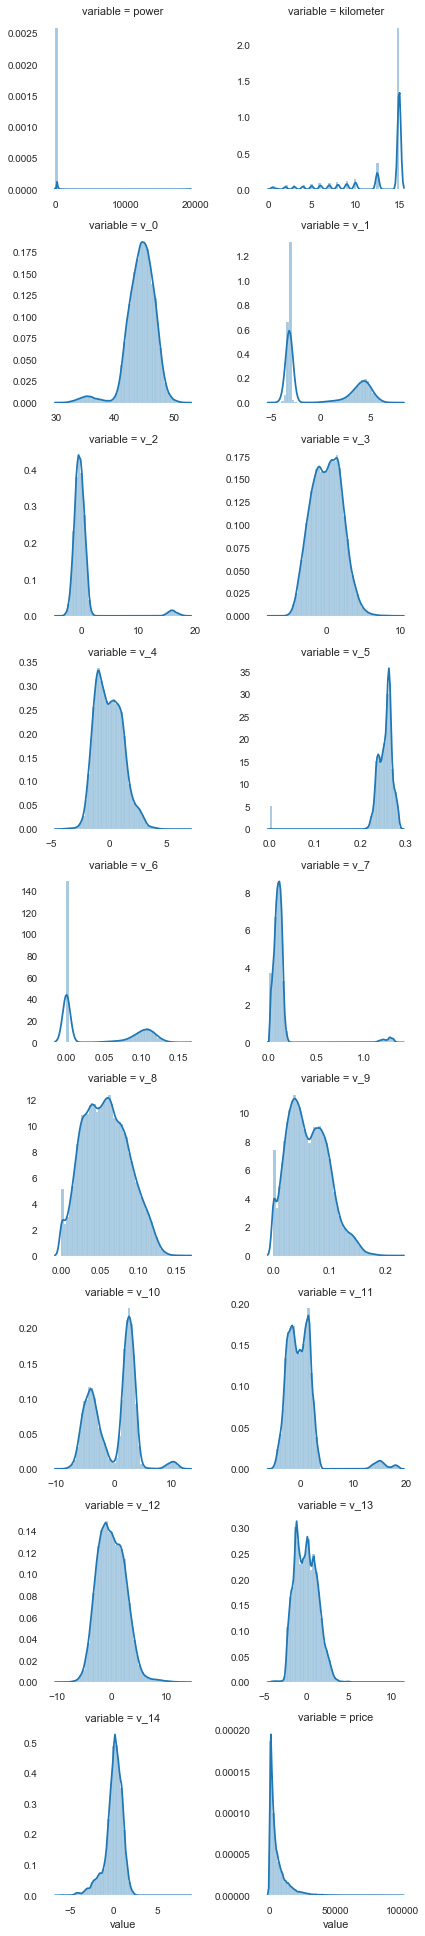

In [67]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")  

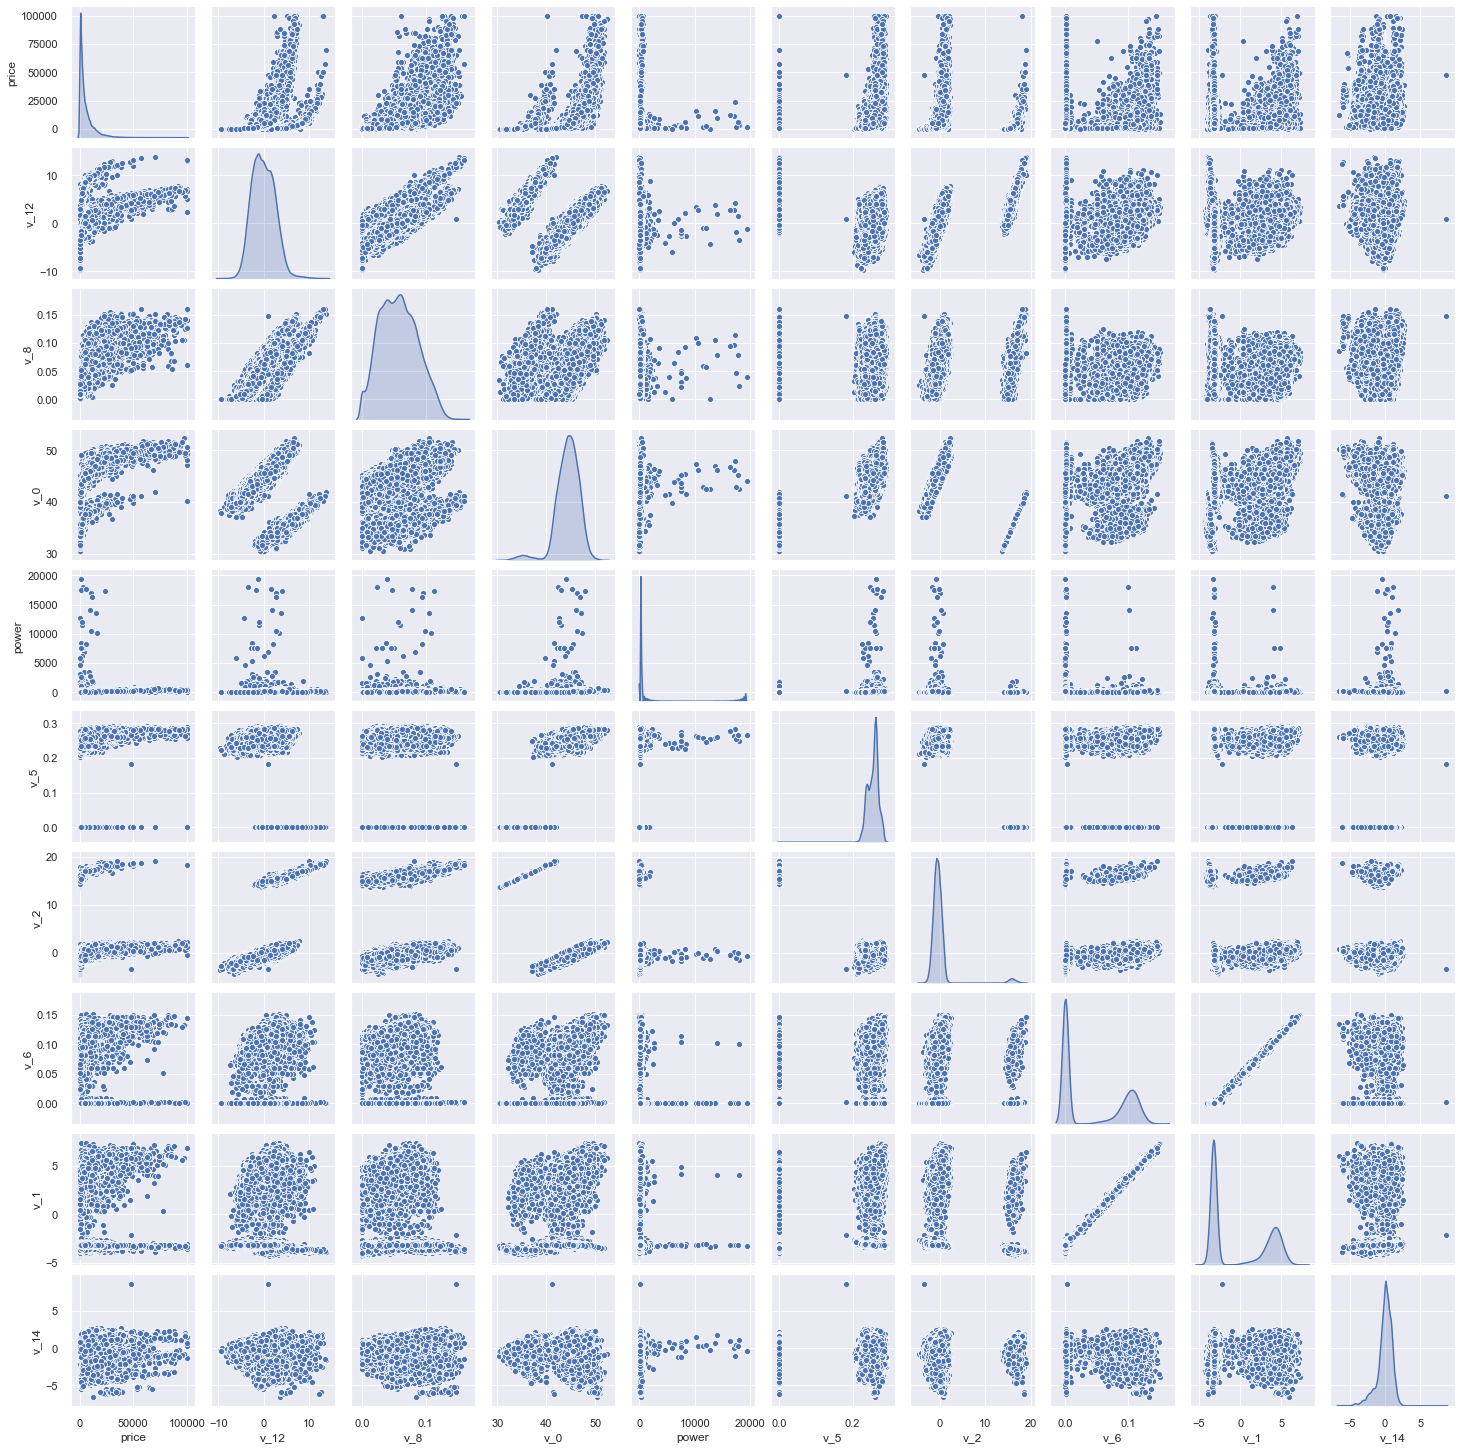

In [68]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()  

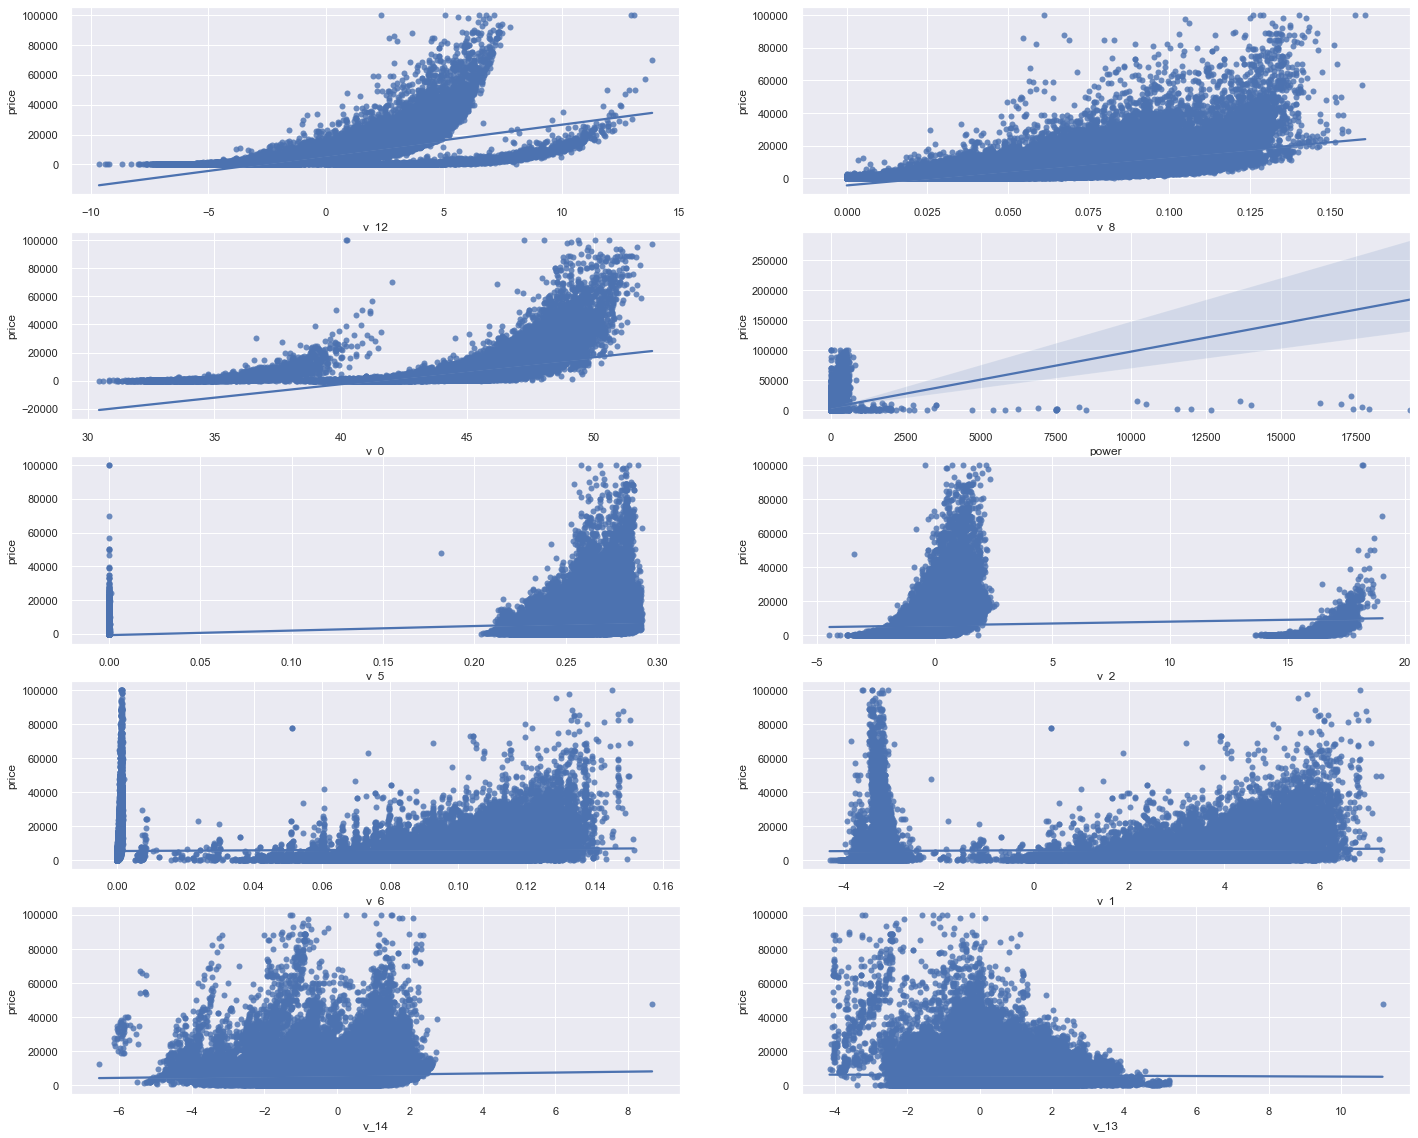

In [69]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

### 类别特征分析

In [72]:
## 1) unique分布
for fea in categorical_features:
    print(fea,
          Train_data[fea].nunique())   

name 99662
model 248
brand 40
bodyType 8
fuelType 7
gearbox 2
notRepairedDamage 2
regionCode 7905


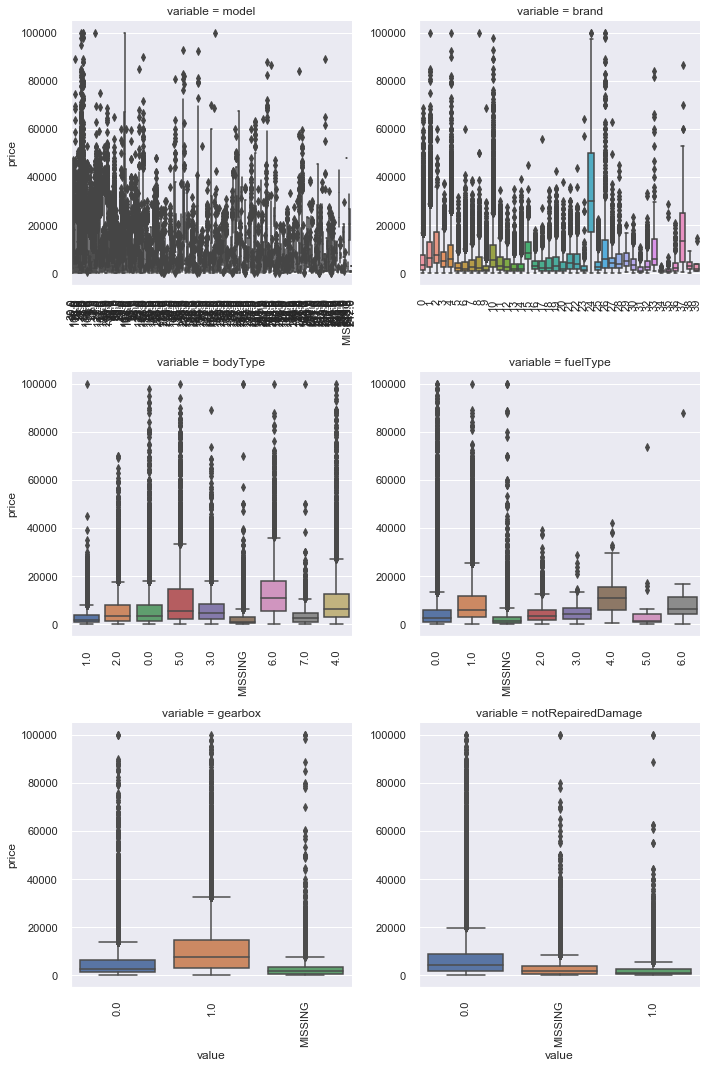

In [73]:
## 2) 类别特征箱形图可视化

# 因为 name 和 regionCode 的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price") 

### 用pandas_profiling生成数据报告

In [85]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("example.html")     

TypeError: unhashable type: 'list'

In [80]:
profile = Train_data.profile_report(title='Pandas Profiling Report')
profile.to_file("example.html")

TypeError: unhashable type: 'list'

数据探索在机器学习中我们一般称为EDA（Exploratory Data Analysis）：

>是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

数据探索有利于我们发现数据的一些特性，数据之间的关联性，对于后续的特征构建是很有帮助的。

对于数据的初步分析（直接查看数据，或.sum(), .mean()，.descirbe()等统计函数）可以从：样本数量，训练集数量，是否有时间特征，是否是时许问题，特征所表示的含义（非匿名特征），特征类型（字符类似，int，float，time），特征的缺失情况（注意缺失的在数据中的表现形式，有些是空的有些是”NAN”符号等），特征的均值方差情况。

分析记录某些特征值缺失占比30%以上样本的缺失处理，有助于后续的模型验证和调节，分析特征应该是填充（填充方式是什么，均值填充，0填充，众数填充等），还是舍去，还是先做样本分类用不同的特征模型去预测。

对于异常值做专门的分析，分析特征异常的label是否为异常值（或者偏离均值较远或者事特殊符号）,异常值是否应该剔除，还是用正常值填充，是记录异常，还是机器本身异常等。

对于Label做专门的分析，分析标签的分布情况等。

进步分析可以通过对特征作图，特征和label联合做图（统计图，离散图），直观了解特征的分布情况，通过这一步也可以发现数据之中的一些异常值等，通过箱型图分析一些特征值的偏离情况，对于特征和特征联合作图，对于特征和label联合作图，分析其中的一些关联性。

### 缺失值处理

In [84]:
# RF填充 
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


def missing_implute_rf(X_missing, y):
    """
    X_missing: feature columns 
    y: target
    """

    sortindex = np.argsort(X_missing.isnull().sum(axis=0)).values

    for i in sortindex:

        # Construct new feature matrix and new labels
        df = X_missing
        if df.iloc[:, i].isnull().sum() > 0:
            fillc = df.iloc[:, i]
            df = pd.concat(
                [df.iloc[:, df.columns != df.columns[i]], pd.DataFrame(y)], axis=1)
            # Filling columns with missing values with 0 in new feature matrix
            df_0 = SimpleImputer(missing_values=np.nan,
                                 strategy='constant', fill_value=0).fit_transform(df)
            # New train datesets and test datasets
            Y_train = fillc[fillc.notnull()]
            Y_test = fillc[fillc.isnull()]
            X_train = df_0[Y_train.index, :]
            X_test = df_0[Y_test.index, :]
            # Filling missing values with random forest regression
            rfc = RandomForestRegressor(n_estimators=5)
            rfc = rfc.fit(X_train, Y_train)
            Y_predict = rfc.predict(X_test)
            # Add the filled features to the original feature matrix
            X_missing.loc[X_missing.iloc[:, i].isnull(
            ), X_missing.columns[i]] = Y_predict
    return pd.concat([X_missing, pd.DataFrame(y)], axis=1)  